In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('input/Lionel Messi Goals.csv')
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


## Number of goals per year

In [83]:
def get_year(x):
    return x[-4:]

data['Date'] = data['Date'].apply(get_year)
data['Index'] = data.index
dl = data.groupby(['Date'])['Index'].nunique().reset_index()
dl

,Date,Index
0,2005,3
1,2006,12
2,2007,31
3,2008,22
4,2009,41
5,2010,60
6,2011,59
7,2012,91
8,2013,45
9,2014,58


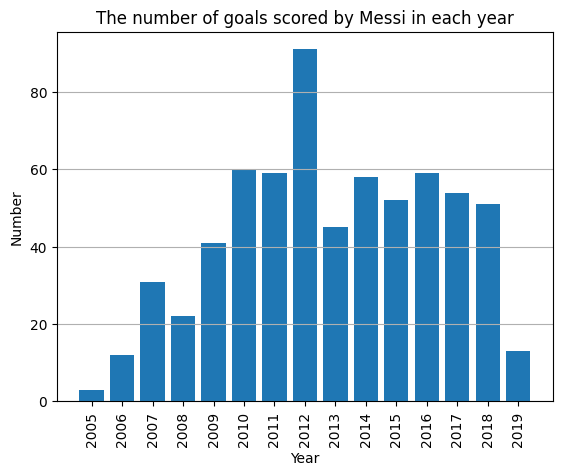

In [90]:
plt.bar(dl['Date'], dl['Index'])
plt.title('The number of goals scored by Messi in each year')
plt.xticks(rotation='vertical')
plt.ylabel('Number')
plt.xlabel('Year')
plt.grid(axis='y')
plt.show()

## The foot with which the penalty was taken

In [94]:
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Index
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,0
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,1
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,3
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,4


In [109]:
data = data.rename(columns={"Goal Type": "Goal_Type"})
df3 = data.query('Goal_Type == "Penalty"')['Goal Method'].reset_index()
df3


,index,Goal Method
0,0,Left foot
1,15,Left foot
2,29,Left foot
3,35,Left foot
4,37,Left foot
...,...,...
77,591,Left foot
78,605,Left foot
79,610,Left foot
80,614,Left foot


In [116]:
df4 = df3.groupby(['Goal Method'])['index'].nunique().reset_index()
df4.loc[len(df4)] = ['Right foot', 0]
df4

,Goal Method,index
0,Left foot,82
1,Right foot,0


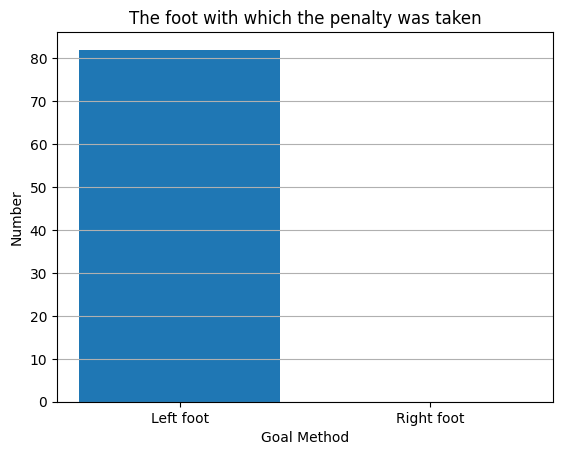

In [117]:
plt.bar(df4['Goal Method'], df4['index']) 
plt.title('The foot with which the penalty was taken')
plt.ylabel('Number')
plt.xlabel('Goal Method')
plt.grid(axis='y')
plt.show()

## What percentage of games in which Messi has scored in extra time have ended in victory

In [119]:
df5 = data.groupby(['Final Game Result'])['Index'].nunique().reset_index()
df5

,Final Game Result,Index
0,Draw,47
1,Lost,18
2,Won,586


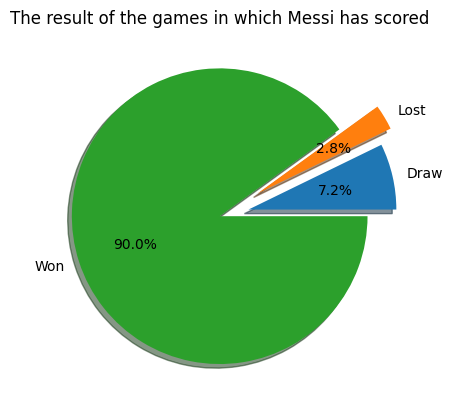

In [127]:
plt.pie(df5['Index'], labels=df5['Final Game Result'], autopct='%1.1F%%', shadow=True, startangle=0, explode=[0.2, 0.3, 0])
plt.title("The result of the games in which Messi has scored")
plt.show()

## Class codes

In [42]:
df = data['Goal Type'].value_counts().reset_index()
df

,index,Goal Type
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


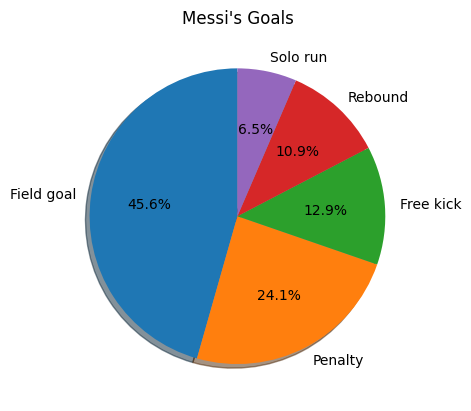

In [43]:
plt.pie(df['Goal Type'], labels=df['index'], autopct='%1.1F%%', shadow=True, startangle=90)
plt.title("Messi's Goals")
plt.show()

In [44]:
df = data['Goal Method'].value_counts().reset_index()
df

,index,Goal Method
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


In [45]:
df['Goal Method']

0    538
1     86
2     24
3      1
4      1
5      1
Name: Goal Method, dtype: int64

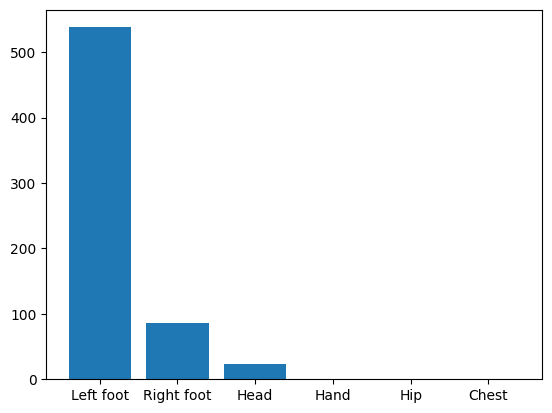

In [46]:
plt.bar(df['index'], df['Goal Method'])
plt.show()

In [47]:
data['Minute'] = data['Minute'].apply(eval)

In [48]:
df = data['Minute'].value_counts().reset_index().sort_values(by=['index'], ascending=True)
df

,index,Minute
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


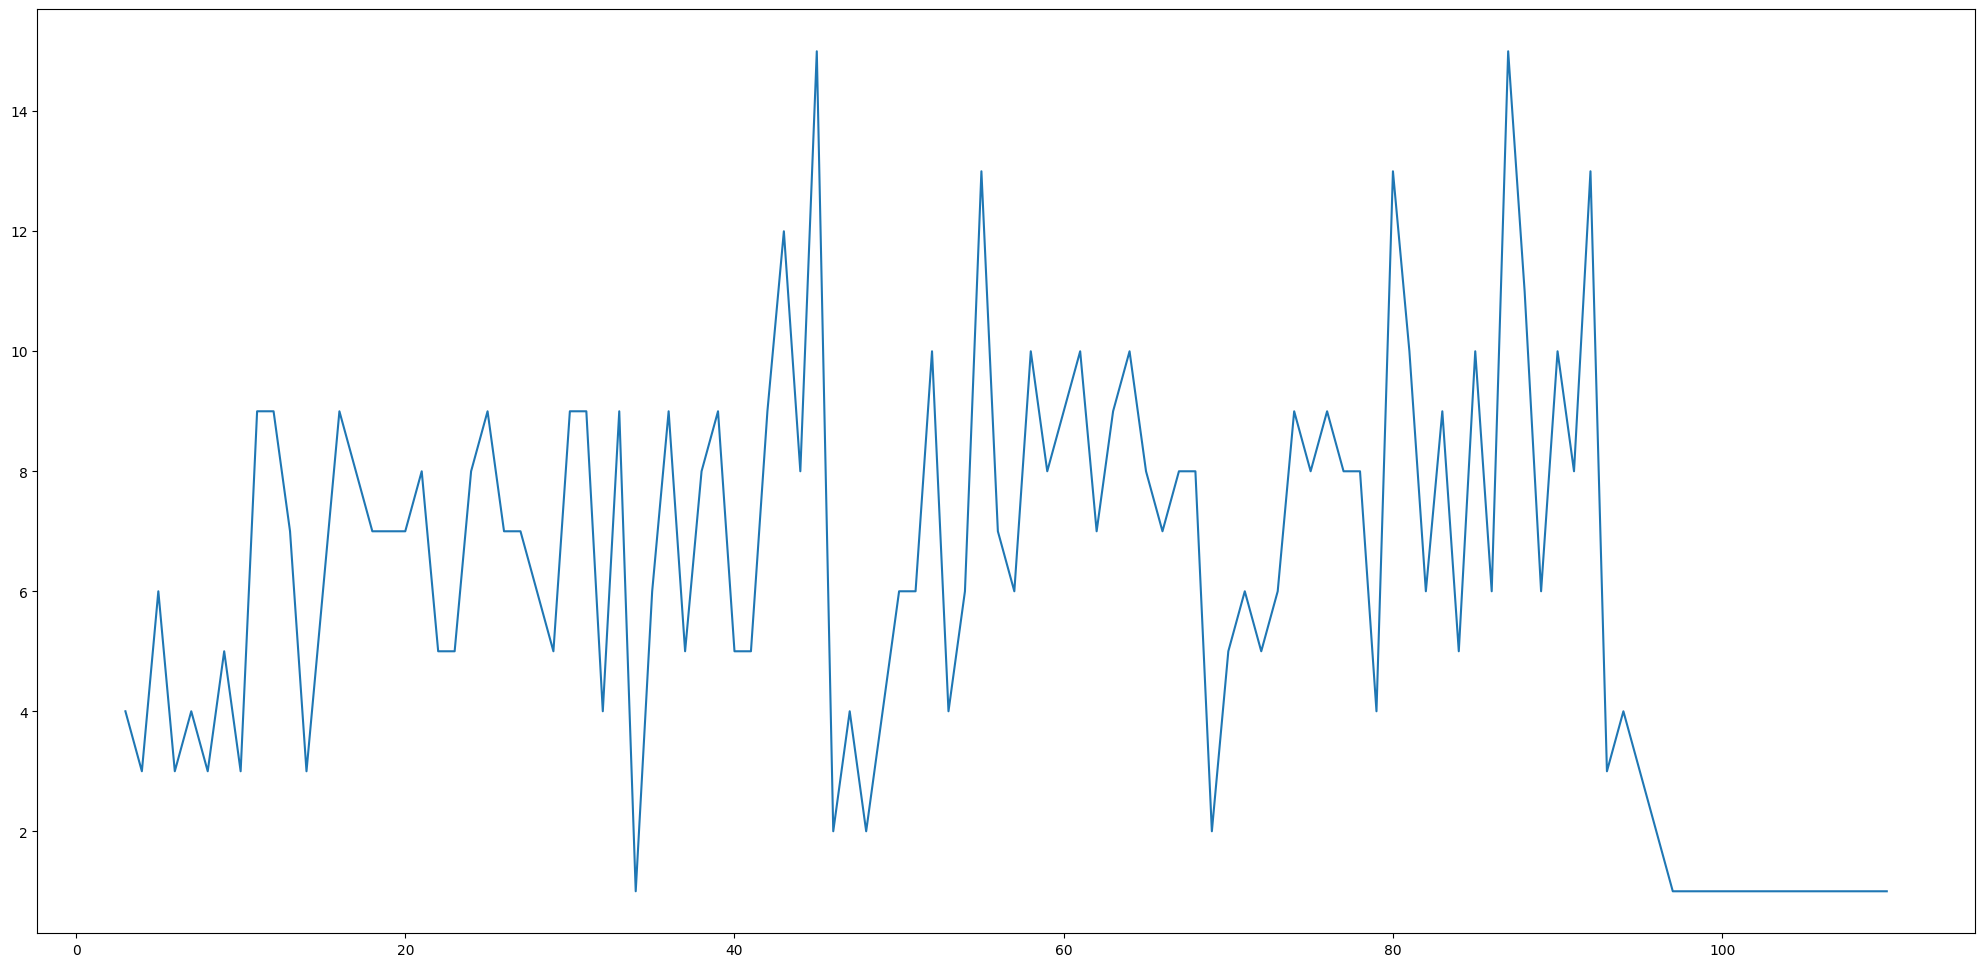

In [49]:
plt.figure(figsize=(25,12))
plt.plot(df['index'], df['Minute'])
plt.show()